In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import restoration
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

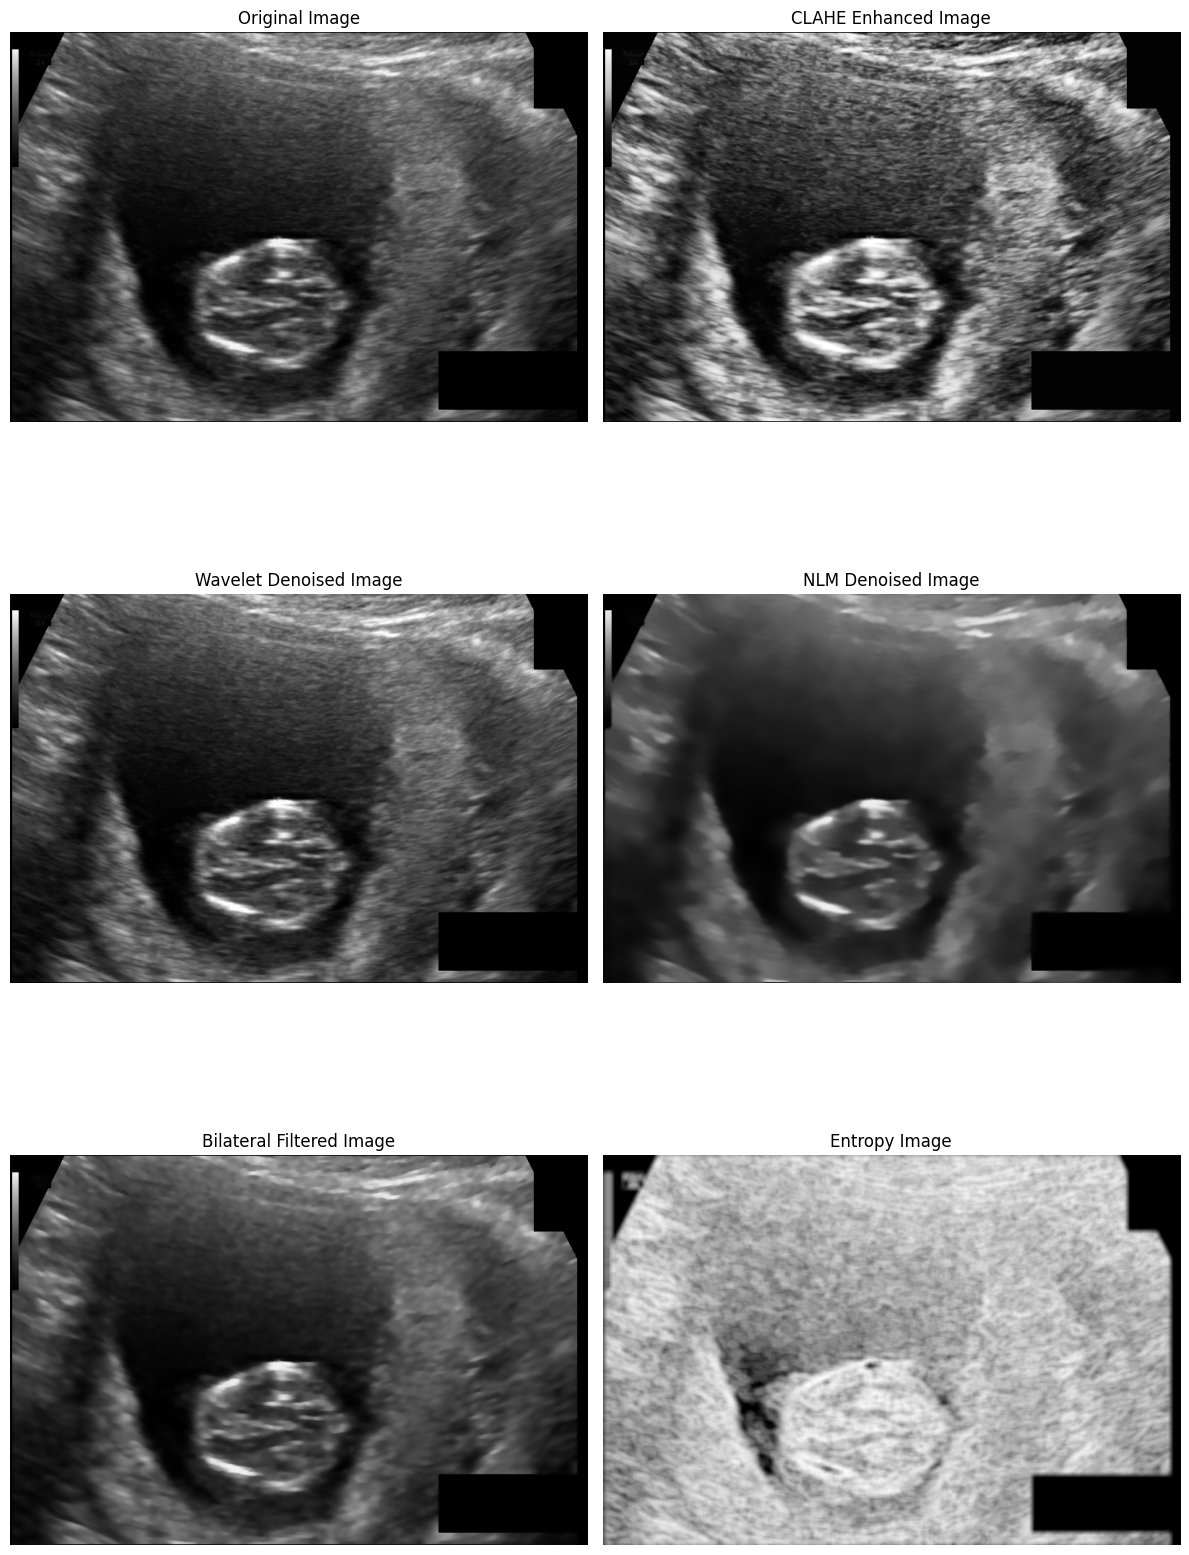

In [3]:
# Load the original image
img_path = "/kaggle/input/fetal-head-ultrasound-segmentation/Fetal_Head_Ultrasound/training/100_2HC.png"
original = cv2.imread(img_path)

# Convert to grayscale
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to the grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# Apply Wavelet Denoising to the grayscale image
wavelet = restoration.denoise_wavelet(gray, convert2ycbcr=False)
wavelet_img = img_as_ubyte(wavelet)

# Apply Non-local Means Denoising to the color image
nlm = restoration.denoise_nl_means(original, patch_size=7, patch_distance=11, h=0.1, channel_axis=-1)
nlm_img = img_as_ubyte(nlm)

# Apply Bilateral Filtering to the color image
bilateral = cv2.bilateralFilter(img_as_ubyte(original), 9, 75, 75)

# Calculate Entropy on the grayscale image
entropy_img = entropy(img_as_ubyte(gray), disk(5))

# Convert color images from BGR to RGB for correct display
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

# Display the original and processed images
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Original image
axes[0, 0].imshow(original_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# CLAHE enhanced image
axes[0, 1].imshow(clahe_img, cmap='gray')
axes[0, 1].set_title("CLAHE Enhanced Image")
axes[0, 1].axis('off')

# Wavelet Denoised image
axes[1, 0].imshow(wavelet_img, cmap='gray')
axes[1, 0].set_title("Wavelet Denoised Image")
axes[1, 0].axis('off')

# NLM Denoised image
axes[1, 1].imshow(nlm_img)
axes[1, 1].set_title("NLM Denoised Image")
axes[1, 1].axis('off')

# Bilateral Filtered image
axes[2, 0].imshow(bilateral_rgb)
axes[2, 0].set_title("Bilateral Filtered Image")
axes[2, 0].axis('off')

# Entropy image
axes[2, 1].imshow(entropy_img, cmap='gray')
axes[2, 1].set_title("Entropy Image")
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

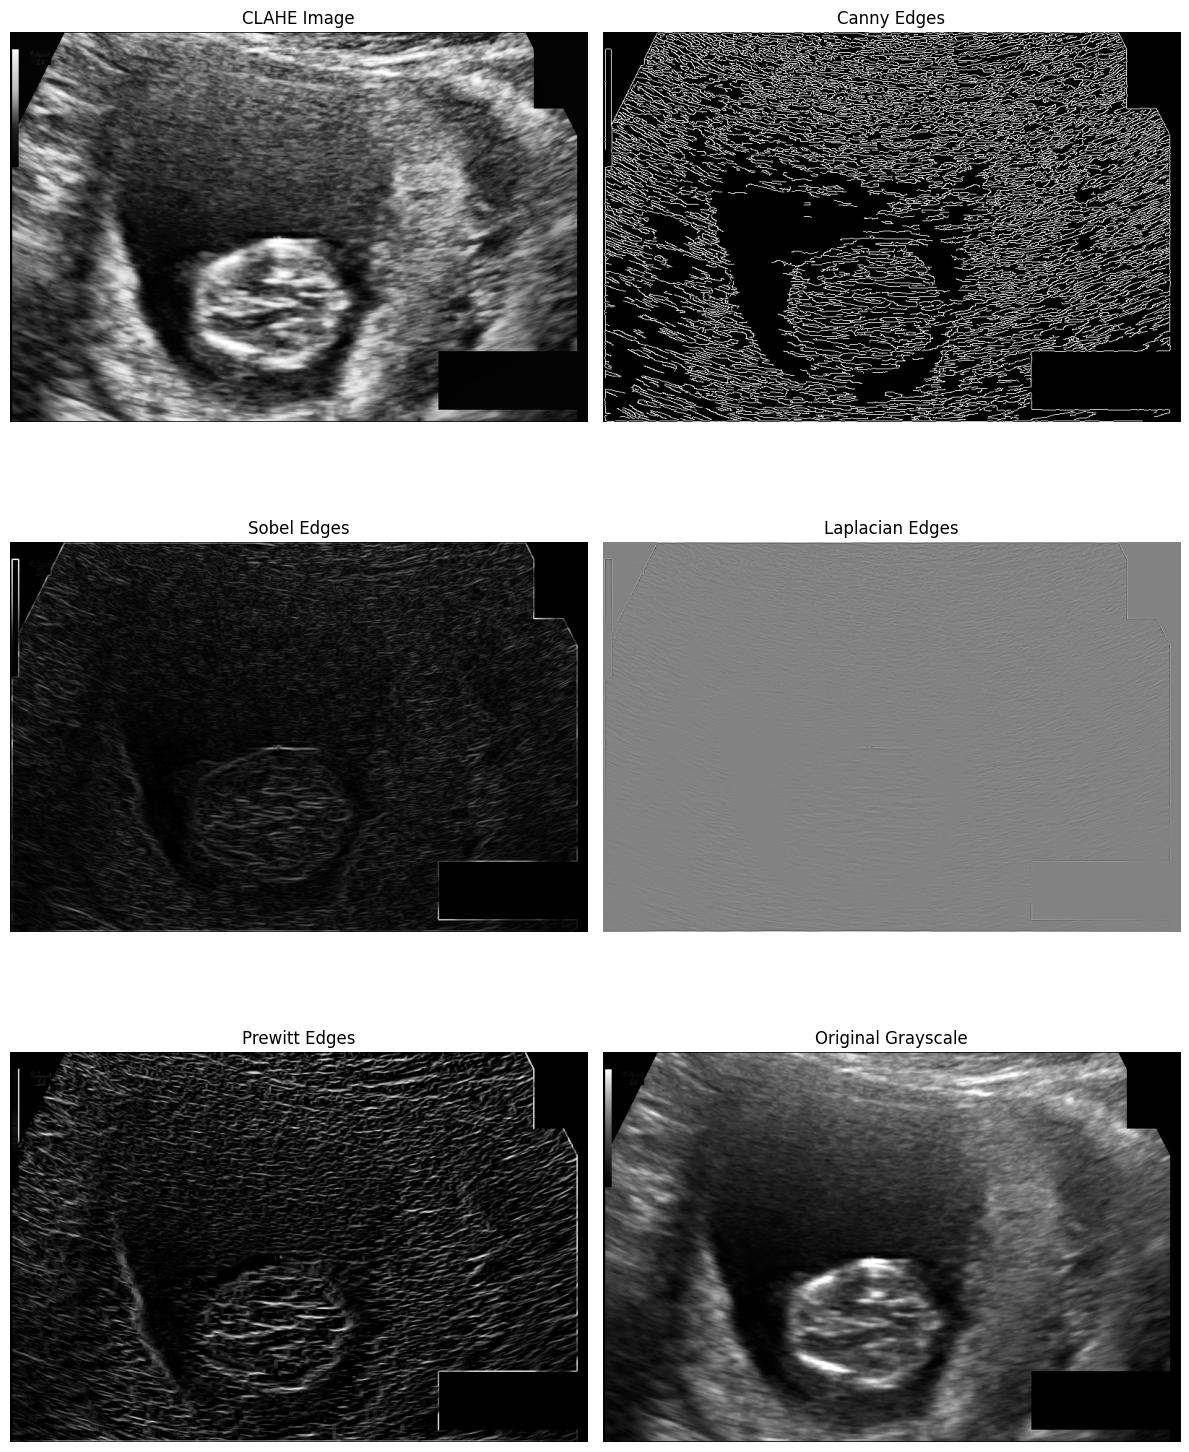

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import prewitt, sobel, laplace

# Load and preprocess image
img_path = "/kaggle/input/fetal-head-ultrasound-segmentation/Fetal_Head_Ultrasound/training/100_2HC.png"
original = cv2.imread(img_path)
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# ----- Edge Detection Methods -----

# 1. Canny Edge Detection
canny = cv2.Canny(clahe_img, 50, 150)

# 2. Sobel (X and Y)
sobelx = cv2.Sobel(clahe_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(clahe_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

# 3. Laplacian
laplacian = cv2.Laplacian(clahe_img, cv2.CV_64F)

# 4. Prewitt (manually)
# Define Prewitt kernels
prewitt_kernel_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])
prewitt_kernel_y = np.array([[1,  1,  1],
                             [0,  0,  0],
                             [-1, -1, -1]])
prewitt_x = cv2.filter2D(clahe_img, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(clahe_img, -1, prewitt_kernel_y)
prewitt_combined = cv2.magnitude(np.float32(prewitt_x), np.float32(prewitt_y))

# ---------- Plot All Edge Maps ----------
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

axes[0, 0].imshow(clahe_img, cmap='gray')
axes[0, 0].set_title("CLAHE Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(canny, cmap='gray')
axes[0, 1].set_title("Canny Edges")
axes[0, 1].axis('off')

axes[1, 0].imshow(sobel_combined, cmap='gray')
axes[1, 0].set_title("Sobel Edges")
axes[1, 0].axis('off')

axes[1, 1].imshow(laplacian, cmap='gray')
axes[1, 1].set_title("Laplacian Edges")
axes[1, 1].axis('off')

axes[2, 0].imshow(prewitt_combined, cmap='gray')
axes[2, 0].set_title("Prewitt Edges")
axes[2, 0].axis('off')

axes[2, 1].imshow(gray, cmap='gray')
axes[2, 1].set_title("Original Grayscale")
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


2025-04-14 14:54:25.316506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744642465.559832      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744642465.631730      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


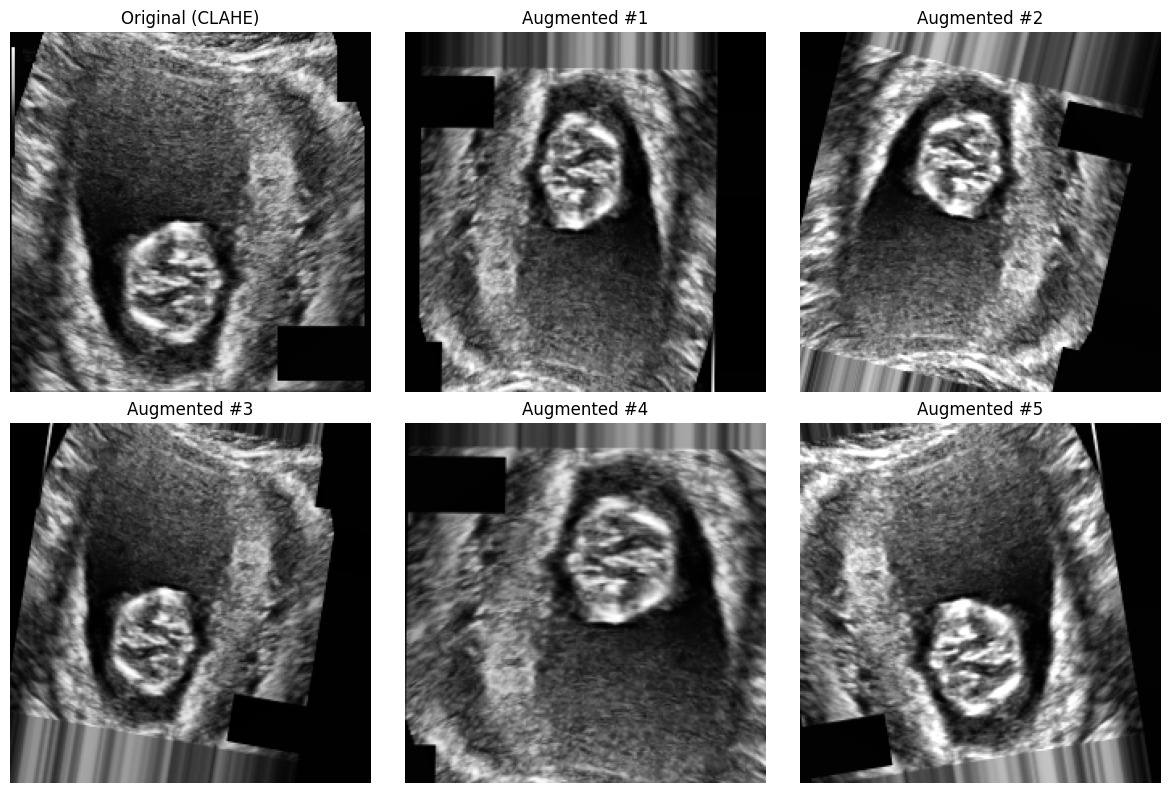

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load image in grayscale
img_path = "/kaggle/input/fetal-head-ultrasound-segmentation/Fetal_Head_Ultrasound/training/100_2HC.png"
original = cv2.imread(img_path)
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# Resize to a shape compatible with deep learning models
img_resized = cv2.resize(clahe_img, (224, 224))

# Expand dimensions to match ImageDataGenerator input shape (batch_size, height, width, channels)
img_expanded = np.expand_dims(img_resized, axis=0)
img_expanded = np.expand_dims(img_expanded, axis=-1)  # Add channel dimension for grayscale

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Generate a batch of augmented images
aug_iter = datagen.flow(img_expanded, batch_size=1)

# Plot original + 5 augmented images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Show original CLAHE-enhanced image
axes[0, 0].imshow(img_resized, cmap='gray')
axes[0, 0].set_title("Original (CLAHE)")
axes[0, 0].axis('off')

# Show 5 augmented images
for i in range(5):
    augmented = next(aug_iter)[0].squeeze()
    ax = axes[(i + 1) // 3, (i + 1) % 3]
    ax.imshow(augmented, cmap='gray')
    ax.set_title(f"Augmented #{i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [7]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
import pandas as pd

# Ensure all images are 8-bit grayscale for fair comparison
gray_original = img_as_ubyte(gray)
gray_wavelet = img_as_ubyte(wavelet)
gray_nlm = cv2.cvtColor(nlm_img, cv2.COLOR_RGB2GRAY)
gray_bilateral = cv2.cvtColor(bilateral_rgb, cv2.COLOR_RGB2GRAY)

# Calculate entropy
entropy_original = entropy(gray_original, disk(5)).mean()
entropy_clahe = entropy(clahe_img, disk(5)).mean()
entropy_wavelet = entropy(gray_wavelet, disk(5)).mean()
entropy_nlm = entropy(gray_nlm, disk(5)).mean()
entropy_bilateral = entropy(gray_bilateral, disk(5)).mean()

# Calculate PSNR (to original)
psnr_clahe = peak_signal_noise_ratio(gray_original, clahe_img)
psnr_wavelet = peak_signal_noise_ratio(gray_original, gray_wavelet)
psnr_nlm = peak_signal_noise_ratio(gray_original, gray_nlm)
psnr_bilateral = peak_signal_noise_ratio(gray_original, gray_bilateral)

# Calculate SSIM (to original)
ssim_clahe = structural_similarity(gray_original, clahe_img)
ssim_wavelet = structural_similarity(gray_original, gray_wavelet)
ssim_nlm = structural_similarity(gray_original, gray_nlm)
ssim_bilateral = structural_similarity(gray_original, gray_bilateral)

# Create evaluation table
results = pd.DataFrame({
    'Method': ['Original', 'CLAHE', 'Wavelet', 'NLM', 'Bilateral'],
    'Entropy': [entropy_original, entropy_clahe, entropy_wavelet, entropy_nlm, entropy_bilateral],
    'PSNR': [None, psnr_clahe, psnr_wavelet, psnr_nlm, psnr_bilateral],
    'SSIM': [None, ssim_clahe, ssim_wavelet, ssim_nlm, ssim_bilateral]
})

print(results.round(4))


      Method  Entropy     PSNR    SSIM
0   Original   3.9998      NaN     NaN
1      CLAHE   4.5193  17.8805  0.7522
2    Wavelet   4.0351  52.6183  0.9979
3        NLM   2.9183  29.3206  0.7432
4  Bilateral   3.5908  35.1936  0.8874


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


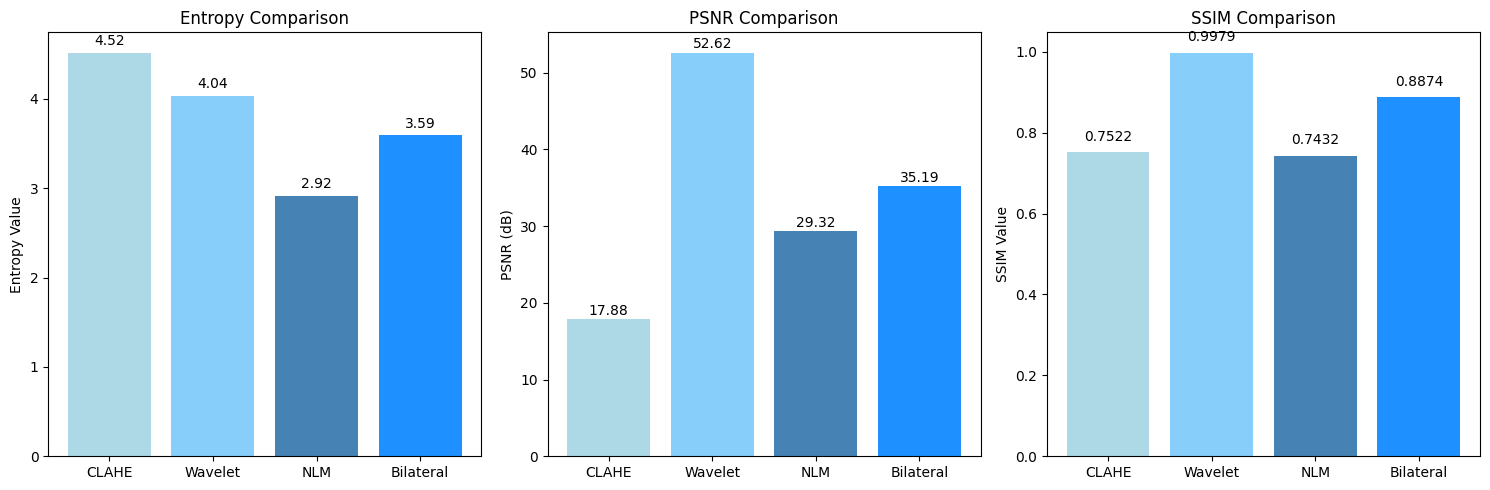

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data to visualize
methods = ['CLAHE', 'Wavelet', 'NLM', 'Bilateral']
entropy_values = [entropy_clahe, entropy_wavelet, entropy_nlm, entropy_bilateral]
psnr_values = [psnr_clahe, psnr_wavelet, psnr_nlm, psnr_bilateral]
ssim_values = [ssim_clahe, ssim_wavelet, ssim_nlm, ssim_bilateral]

# Define shades of blue
blue_shades = ['#add8e6', '#87cefa', '#4682b4', '#1e90ff']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Entropy (in shades of blue)
axes[0].bar(methods, entropy_values, color=blue_shades)
axes[0].set_title('Entropy Comparison')
axes[0].set_ylabel('Entropy Value')
for i, v in enumerate(entropy_values):
    axes[0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Plot PSNR (in shades of blue)
axes[1].bar(methods, psnr_values, color=blue_shades)
axes[1].set_title('PSNR Comparison')
axes[1].set_ylabel('PSNR (dB)')
for i, v in enumerate(psnr_values):
    axes[1].text(i, v + 0.2, f'{v:.2f}', ha='center', va='bottom')

# Plot SSIM (in shades of blue)
axes[2].bar(methods, ssim_values, color=blue_shades)
axes[2].set_title('SSIM Comparison')
axes[2].set_ylabel('SSIM Value')
for i, v in enumerate(ssim_values):
    axes[2].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


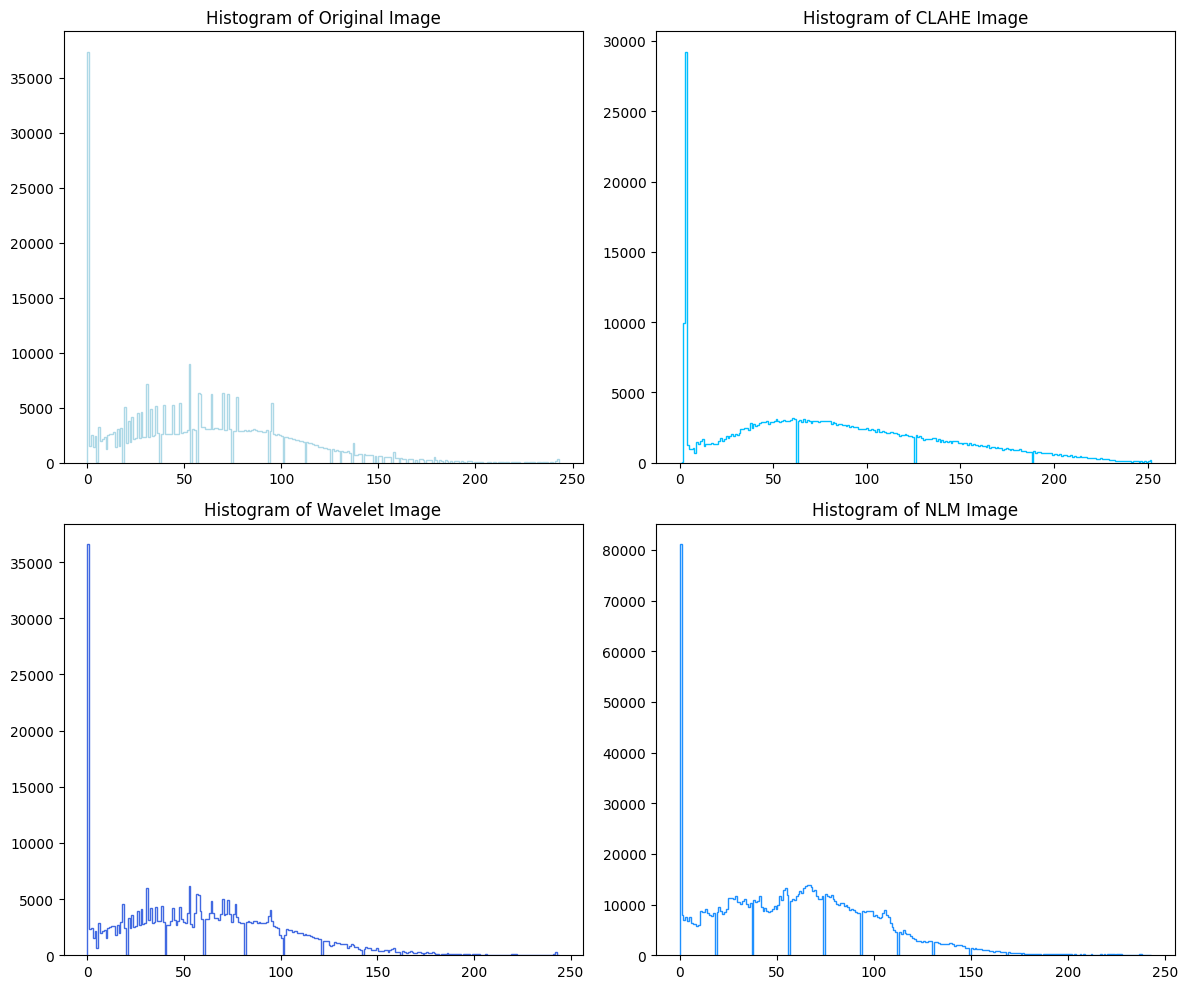

In [16]:
import matplotlib.pyplot as plt

# Plot histograms for intensity distribution with shades of blue
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image histogram
axes[0, 0].hist(gray_original.ravel(), bins=256, histtype='step', color='lightblue')
axes[0, 0].set_title('Histogram of Original Image')

# CLAHE image histogram
axes[0, 1].hist(clahe_img.ravel(), bins=256, histtype='step', color='deepskyblue')
axes[0, 1].set_title('Histogram of CLAHE Image')

# Wavelet image histogram
axes[1, 0].hist(wavelet_img.ravel(), bins=256, histtype='step', color='royalblue')
axes[1, 0].set_title('Histogram of Wavelet Image')

# NLM image histogram
axes[1, 1].hist(nlm_img.ravel(), bins=256, histtype='step', color='dodgerblue')
axes[1, 1].set_title('Histogram of NLM Image')

plt.tight_layout()
plt.show()


In [18]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import restoration
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from tqdm import tqdm

# Path to training images
train_dir = "/kaggle/input/fetal-head-ultrasound-segmentation/Fetal_Head_Ultrasound/training"
image_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Lists to store metrics
entropy_vals = {'Original': [], 'CLAHE': [], 'Wavelet': [], 'NLM': [], 'Bilateral': []}
psnr_vals = {'CLAHE': [], 'Wavelet': [], 'NLM': [], 'Bilateral': []}
ssim_vals = {'CLAHE': [], 'Wavelet': [], 'NLM': [], 'Bilateral': []}

# Loop over all training images
for img_path in tqdm(image_files, desc="Processing Images"):
    # Load original and grayscale
    original = cv2.imread(img_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)

    # Wavelet Denoising
    wavelet = restoration.denoise_wavelet(gray, convert2ycbcr=False, rescale_sigma=True)
    wavelet_img = img_as_ubyte(wavelet)

    # NLM Denoising
    nlm = restoration.denoise_nl_means(original, patch_size=7, patch_distance=11, h=0.1, channel_axis=-1)
    nlm_img = img_as_ubyte(nlm)
    gray_nlm = cv2.cvtColor(nlm_img, cv2.COLOR_RGB2GRAY)

    # Bilateral
    bilateral = cv2.bilateralFilter(img_as_ubyte(original), 9, 75, 75)
    gray_bilateral = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

    # Convert all to 8-bit grayscale for fair comparison
    gray_original = img_as_ubyte(gray)

    # Entropy
    entropy_vals['Original'].append(entropy(gray_original, disk(5)).mean())
    entropy_vals['CLAHE'].append(entropy(clahe_img, disk(5)).mean())
    entropy_vals['Wavelet'].append(entropy(wavelet_img, disk(5)).mean())
    entropy_vals['NLM'].append(entropy(gray_nlm, disk(5)).mean())
    entropy_vals['Bilateral'].append(entropy(gray_bilateral, disk(5)).mean())

    # PSNR
    psnr_vals['CLAHE'].append(peak_signal_noise_ratio(gray_original, clahe_img))
    psnr_vals['Wavelet'].append(peak_signal_noise_ratio(gray_original, wavelet_img))
    psnr_vals['NLM'].append(peak_signal_noise_ratio(gray_original, gray_nlm))
    psnr_vals['Bilateral'].append(peak_signal_noise_ratio(gray_original, gray_bilateral))

    # SSIM
    ssim_vals['CLAHE'].append(structural_similarity(gray_original, clahe_img))
    ssim_vals['Wavelet'].append(structural_similarity(gray_original, wavelet_img))
    ssim_vals['NLM'].append(structural_similarity(gray_original, gray_nlm))
    ssim_vals['Bilateral'].append(structural_similarity(gray_original, gray_bilateral))

# Compute averages
results = pd.DataFrame({
    'Method': ['Original', 'CLAHE', 'Wavelet', 'NLM', 'Bilateral'],
    'Entropy': [
        np.mean(entropy_vals['Original']),
        np.mean(entropy_vals['CLAHE']),
        np.mean(entropy_vals['Wavelet']),
        np.mean(entropy_vals['NLM']),
        np.mean(entropy_vals['Bilateral'])
    ],
    'PSNR': [
        None,
        np.mean(psnr_vals['CLAHE']),
        np.mean(psnr_vals['Wavelet']),
        np.mean(psnr_vals['NLM']),
        np.mean(psnr_vals['Bilateral'])
    ],
    'SSIM': [
        None,
        np.mean(ssim_vals['CLAHE']),
        np.mean(ssim_vals['Wavelet']),
        np.mean(ssim_vals['NLM']),
        np.mean(ssim_vals['Bilateral'])
    ]
})

# Display rounded results
print(results.round(4))


Processing Images:   0%|          | 0/1600 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
Processing Images: 100%|██████████| 1600/1600 [2:00:18<00:00,  4.51s/it] 

      Method  Entropy     PSNR    SSIM
0   Original   1.4923      NaN     NaN
1      CLAHE   1.6729  29.1245  0.5717
2    Wavelet   1.5225      inf  0.8960
3        NLM   1.2027  48.2710  0.9335
4  Bilateral   1.4178      inf  0.9799



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


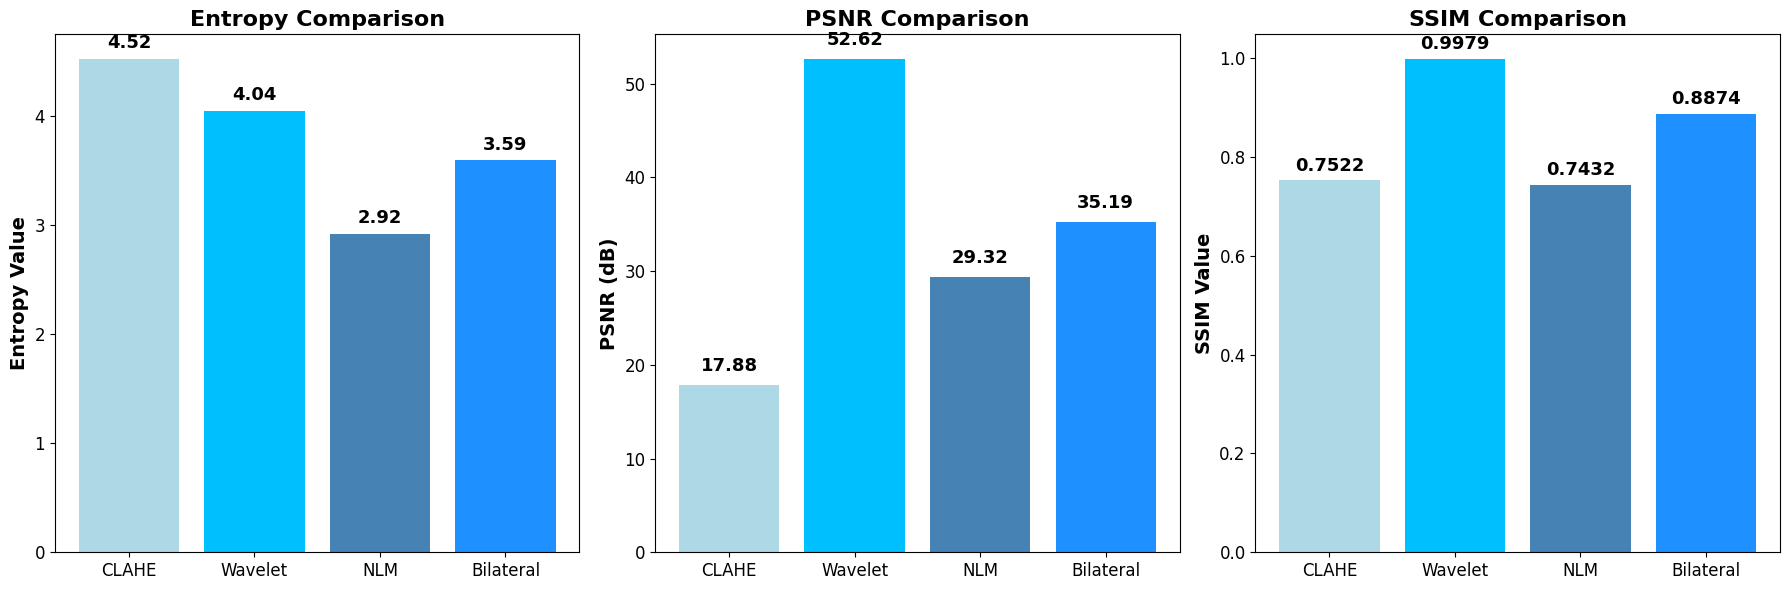

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample values
methods = ['CLAHE', 'Wavelet', 'NLM', 'Bilateral']
entropy = [4.52, 4.04, 2.92, 3.59]
psnr = [17.88, 52.62, 29.32, 35.19]
ssim = [0.7522, 0.9979, 0.7432, 0.8874]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

font_title = {'fontweight': 'bold', 'fontsize': 16}
font_label = {'fontweight': 'bold', 'fontsize': 14}
font_ticks = {'fontsize': 12}
font_text = {'fontweight': 'bold', 'fontsize': 13}

# Plot 1: Entropy
axs[0].bar(methods, entropy, color=['lightblue', 'deepskyblue', 'steelblue', 'dodgerblue'])
axs[0].set_title('Entropy Comparison', **font_title)
axs[0].set_ylabel('Entropy Value', **font_label)
axs[0].tick_params(axis='both', labelsize=font_ticks['fontsize'])
for i, v in enumerate(entropy):
    axs[0].text(i, v + 0.1, f'{v:.2f}', ha='center', **font_text)

# Plot 2: PSNR
axs[1].bar(methods, psnr, color=['lightblue', 'deepskyblue', 'steelblue', 'dodgerblue'])
axs[1].set_title('PSNR Comparison', **font_title)
axs[1].set_ylabel('PSNR (dB)', **font_label)
axs[1].tick_params(axis='both', labelsize=font_ticks['fontsize'])
for i, v in enumerate(psnr):
    axs[1].text(i, v + 1.5, f'{v:.2f}', ha='center', **font_text)

# Plot 3: SSIM
axs[2].bar(methods, ssim, color=['lightblue', 'deepskyblue', 'steelblue', 'dodgerblue'])
axs[2].set_title('SSIM Comparison', **font_title)
axs[2].set_ylabel('SSIM Value', **font_label)
axs[2].tick_params(axis='both', labelsize=font_ticks['fontsize'])
for i, v in enumerate(ssim):
    axs[2].text(i, v + 0.02, f'{v:.4f}', ha='center', **font_text)

plt.tight_layout()
plt.show()
